<a href="https://colab.research.google.com/github/AndresMontesDeOca/Redes_Neuronales/blob/main/Clase_04/02_Eficiencia_energetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion con Multiperceptrón de Scikit-Learn
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Fuentes/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Data/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


### Carga del Dataset y selección de atributos numéricos

In [19]:
# pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# # metadata
# print(energy_efficiency.metadata)

# # variable information
# print(energy_efficiency.variables)

data = pd.concat([X, y], axis=1)
data.columns = energy_efficiency.variables['description'].values
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# # Cargar el dataset
# DATOS_DIR = '/mnt/data/'
# data = pd.read_csv(DATOS_DIR + 'nombre_del_archivo.csv')  # Reemplaza 'nombre_del_archivo.csv' con el nombre real del archivo

# # Verificar los primeros datos
# print(data.head())

# Seleccionar características relevantes y la variable objetivo
features = data[['Wall Area', 'Roof Area', 'Glazing Area']]
target = data['Cooling Load']

# Eliminar filas con valores faltantes
features = features.dropna()
target = target[features.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo utilizando MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = mlp.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 6.6173265132050005
R2 Score: 0.9285827341967955


In [ ]:
MAX_ITER = 10000
COTA = 0.001
ALFA = 0.001
# cantidad de datos a procesar para actualizar pesos
TAM_LOTE = 50

ACTIVACION = 'relu'
#ACTIVACION = 'tanh'
#ACTIVATION = 'identity'

#OPTIMIZADOR = 'lbfgs'
OPTIMIZADOR = 'sgd'
#OPTIMIZADOR = 'adam'

mlpr = MLPRegressor(
    hidden_layer_sizes=[30, 15],  # Arquitectura con tres capas ocultas
    activation=ACTIVACION,  # Función de activación de capas ocultas.
    solver=OPTIMIZADOR,     # Algoritmo de optimización
    max_iter=MAX_ITER,      # Número máximo de iteraciones
    alpha=ALFA,             # Tasa de aprendizaje.
    random_state=None,      # Semilla para la generación de números aleatorios para reproducibilidad.
    batch_size=TAM_LOTE,    # Tamaño del lote de datos utilizado para la actualización de pesos.
    tol=COTA,               # Tolerancia para la convergencia de parada temprana
    verbose=True            # Imprimir información durante el entrenamiento.
)

mlpr.fit(X_train, Y_train)

print('Iteraciones realizadas: %d' % mlpr.n_iter_)

<Axes: >

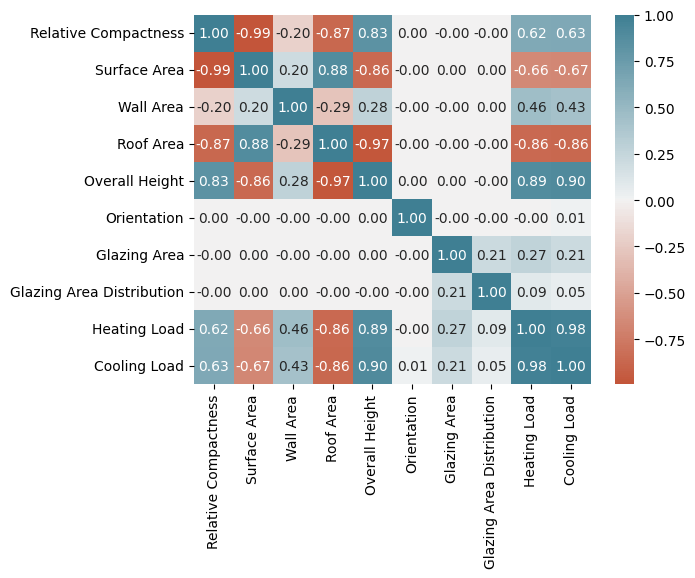

In [22]:
sns.heatmap(data.corr(),annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')

### Verificación de tipos de datos y valores nulos

### Muestra las primeras filas de los Datos

### Matriz de Correlación con Seaborn

<Axes: >

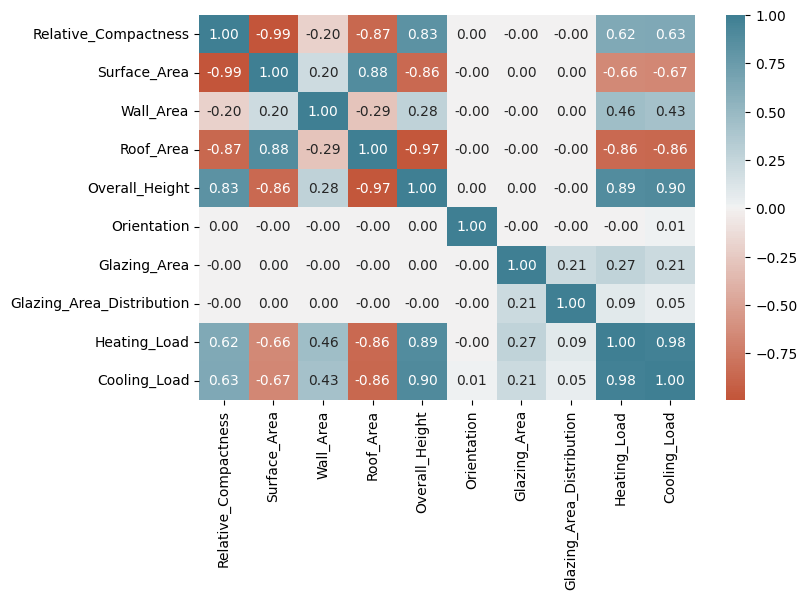

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')

### Selección de atributos. Separación en entrenamiento y prueba. Normalización de valores

In [ ]:
# elimina atributos redundantes
X = np.array(df.drop(['Heating_Load','Cooling_Load', 'Relative_Compactness', 'Overall_Height'],axis=1))

# Y= df[['Heating Load']]
Y= np.array(df['Cooling_Load'])

# Separa datos en grupo de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 20)

data_scaler = StandardScaler()
# data_scaler = MinMaxScaler()

X_train = data_scaler.fit_transform(X_train)
X_test = data_scaler.transform(X_test)

### Construccion del Modelo

In [ ]:
MAX_ITER = 10000
COTA = 0.001
ALFA = 0.001
# cantidad de datos a procesar para actualizar pesos
TAM_LOTE = 50

ACTIVACION = 'relu'
#ACTIVACION = 'tanh'
#ACTIVATION = 'identity'

#OPTIMIZADOR = 'lbfgs'
OPTIMIZADOR = 'sgd'
#OPTIMIZADOR = 'adam'

mlpr = MLPRegressor(
    hidden_layer_sizes=[30, 15],  # Arquitectura con tres capas ocultas
    activation=ACTIVACION,  # Función de activación de capas ocultas.
    solver=OPTIMIZADOR,     # Algoritmo de optimización
    max_iter=MAX_ITER,      # Número máximo de iteraciones
    alpha=ALFA,             # Tasa de aprendizaje.
    random_state=None,      # Semilla para la generación de números aleatorios para reproducibilidad.
    batch_size=TAM_LOTE,    # Tamaño del lote de datos utilizado para la actualización de pesos.
    tol=COTA,               # Tolerancia para la convergencia de parada temprana
    verbose=True            # Imprimir información durante el entrenamiento.
)

mlpr.fit(X_train, Y_train)

print('Iteraciones realizadas: %d' % mlpr.n_iter_)

Iteration 1, loss = 287.27733093
Iteration 2, loss = 37.11693253
Iteration 3, loss = 13.64459323
Iteration 4, loss = 10.77999062
Iteration 5, loss = 9.87638941
Iteration 6, loss = 9.24792722
Iteration 7, loss = 8.79346669
Iteration 8, loss = 8.98551692
Iteration 9, loss = 8.58520094
Iteration 10, loss = 8.47249240
Iteration 11, loss = 8.03441336
Iteration 12, loss = 7.79441917
Iteration 13, loss = 7.40036323
Iteration 14, loss = 7.01185535
Iteration 15, loss = 6.56932887
Iteration 16, loss = 6.19555813
Iteration 17, loss = 5.80571854
Iteration 18, loss = 5.54170637
Iteration 19, loss = 5.26337288
Iteration 20, loss = 4.77311505
Iteration 21, loss = 4.63682417
Iteration 22, loss = 4.32757859
Iteration 23, loss = 4.07031029
Iteration 24, loss = 3.83510419
Iteration 25, loss = 3.77261120
Iteration 26, loss = 3.61640917
Iteration 27, loss = 3.48432235
Iteration 28, loss = 3.37227286
Iteration 29, loss = 3.38284593
Iteration 30, loss = 3.37125871
Iteration 31, loss = 3.26159203
Iteration 32

In [ ]:
mlpr.out_activation_ = 'identity'

### Metricas sobre el modelo

In [ ]:
# Realizar predicciones
Y_pred = mlpr.predict(X_test)

# Calcular métricas de evaluación usando las predicciones (Y_pred) y los valores reales (Y_test)
mae = mean_absolute_error(Y_test, Y_pred)  # Calcular el error absoluto medio
mse = mean_squared_error(Y_test, Y_pred)   # Calcular el error cuadrático medio
rmse = np.sqrt(mse)                        # Calcular la raíz del error cuadrático medio
r2 = r2_score(Y_test, Y_pred)              # Calcular el coeficiente de determinación

print(f"    Mean Absolute Error: {mae}")
print(f"     Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"     R-squared r2_score: {r2}")

# tambien puede calcularse R^2 con el MLPRegressor
print(f" R-squared MLPRegressor:", mlpr.score(X_test, Y_test))
# R2 (R cuadrado) es la proporción de varianza en la variable dependiente que es predecible a
# partir de las independientes en un modelo de regresión. R2=1 significa que el modelo explica el
# 100% de la variabilidad en los datos

    Mean Absolute Error: 0.8251613140379517
     Mean Squared Error: 1.3521798343974647
Root Mean Squared Error: 1.1628326768703503
     R-squared r2_score: 0.9850478302330404
 R-squared MLPRegressor: 0.9850478302330404


### Gráfico con evolución de curva de perdida

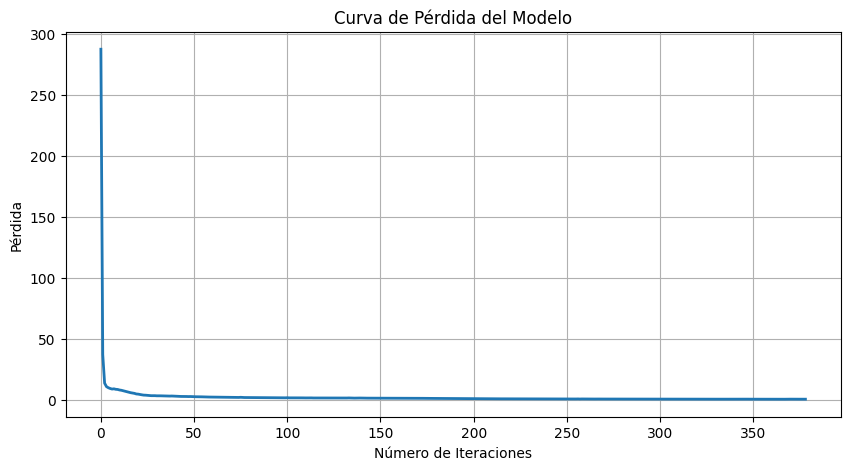

In [ ]:
loss_curve = mlpr.loss_curve_  # curva de pérdida del modelo

# Dibuja curva de pérdida
plt.figure(figsize=(10, 5))
plt.plot(loss_curve, linewidth=2)
plt.title('Curva de Pérdida del Modelo')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()